In [13]:
# 1. download / load dataset
import torchvision

to_download_once = False

train_data = torchvision.datasets.MNIST(
    root='./dataset/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=to_download_once)

test_data = torchvision.datasets.MNIST(
    root='./dataset/', 
    train=False)

In [14]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./dataset/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
# data range: [0, 255]
test_data.data[0].max().item()

255

In [24]:
print(train_data.data.size())
print(train_data.targets.size())
print(train_data.data[0].size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([28, 28])


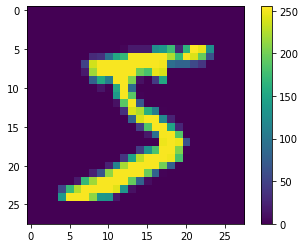

tensor(5)


In [17]:
# 2. plot images
import matplotlib.pyplot as plt
%matplotlib inline

# show the first image
plt.figure()
plt.imshow(train_data.data[0].numpy())
plt.colorbar()
plt.grid(False)
plt.show()

# print label
print(train_data.targets[0])

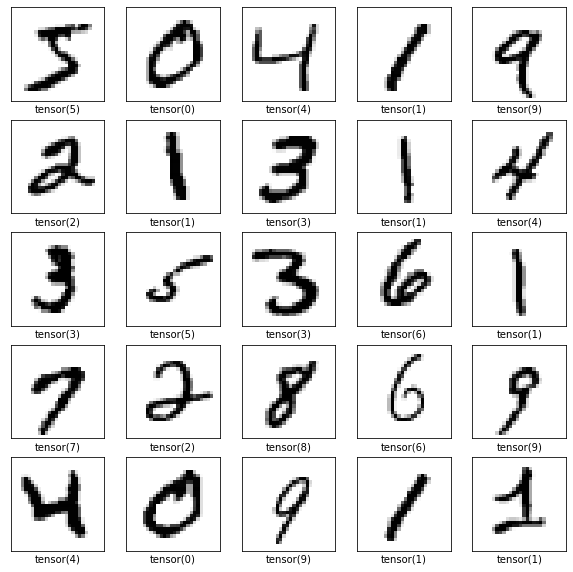

In [18]:
# plot the first 25 images
x_train = train_data.data
y_train = train_data.targets

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [21]:
# 3. Batch and shuffle the dataset
import torch.utils.data as Data
train_loader = Data.DataLoader(
    dataset=train_data, 
    batch_size=32, 
    shuffle=True)

print(len(train_loader)) # 60000/32=1875

1875


In [26]:
# iterate over the dataset and process the elements
for batch_x, batch_y in train_loader:
    print(batch_x.size()) # note 1: the original image size (28, 28) is expanded to (1, 28, 28)
    print(batch_x.max())  # note 2: data range is normalized to [0, 1]
    break

torch.Size([32, 1, 28, 28])
tensor(1.)
